<div style="text-align: start; background-color: #f0f0f0; padding: 20px;">
  <h1 style="color: #333;font-size:40px"><span>&#128722;</span>French Grocery Shopping Insights:</h1>
  <p style="font-size: 24px; color: green; line-height: 32px;"><span style="color:red">Association Rule Learning</span> for Complementary Products - Project</p>
</div>


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtgD6Ln6IwFG3B96i3JavNkSuH3YTWXhzSyQ&usqp=CAU" style="width:100%">

## Problem Statement:
A French grocery store has shared all the transactions of a week. The dataset contains the different items customers have bought together.

We have to learn the Association rules to help the French store determine the top 5 items that are bought together to help them make packages or place these items together.

## Data Description:
InvoiceNo: Invoice Number of the order.
Order: List of items bought by a customer.


<a id="table_content"></a>

# Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Data Transformation: Exploding Orders by InvoiceNo](#3.1)**
- **[4: EDA](#4)**
   - **[4.1: Unique items](#4.1)**
   - **[4.2: Top Selling Items](#4.1)**
- **[5: Create Transactional Dataset](#5)**
- **[6: Create One-Hot Encoded dataframe](#6)**
- **[7: Frequent itemsets - Using Apriori](#7)**
- **[8: Association Rules](#8)**
    - **[8.1: Filtering Rules](#8.1)**
- **[9: Conclusion](#9)**

# 1: Import libraries
<a id="1"></a>
 ⬆️[Table Contents](#table_content)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 2: Read Dataset
<a id="2"></a>
 ⬆️[Table Contents](#table_content)

In [3]:
df = pd.read_csv("store_data.csv",sep=";")

In [4]:
df.head()

,InvoiceNo,Order
0,Invoice0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,Invoice1,"burgers,meatballs,eggs"
2,Invoice2,chutney
3,Invoice3,"turkey,avocado"
4,Invoice4,"mineral water,milk,energy bar,whole wheat rice..."


# 3: Dataset Overview
<a id="3"></a>
 ⬆️[Table Contents](#table_content)

In [5]:
df.shape

(7501, 2)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   InvoiceNo  7501 non-null   object
 1   Order      7501 non-null   object
dtypes: object(2)
memory usage: 117.3+ KB


<div style="background-color: green; border: 1px solid #333; border-radius: 5px; padding: 10px;">
    <h2><span>&#128722;</span> Inference:</h2>
    <p>The DataFrame contains a total of <b>7501 entries</b>, with each entry representing a transaction.</p>
    <p>There are <b>2 columns</b> in the DataFrame:</p>
    <ul>
        <li><b>InvoiceNo:</b> Represents the unique invoice number associated with each transaction. All <b>7501 entries</b> have non-null values in this column.</li>
        <li><b>Order:</b> Represents the list of items bought together in each transaction. All <b>7501 entries</b> have non-null values in this column.</li>
    </ul>
    <p>Both columns are of <b>object</b> data type, indicating that they contain string values.</p>
</div>


## 3.1: Data Transformation: Exploding Orders by InvoiceNo
<a id="3.1"></a>
 ⬆️[Table Contents](#table_content)

In [8]:
df['Order'] = df['Order'].str.split(',')
df = df.explode('Order')

# Reset index
df.reset_index(drop=True, inplace=True)
df

,InvoiceNo,Order
0,Invoice0,shrimp
1,Invoice0,almonds
2,Invoice0,avocado
3,Invoice0,vegetables mix
4,Invoice0,green grapes
...,...,...
29358,Invoice7499,green tea
29359,Invoice7500,eggs
29360,Invoice7500,frozen smoothie
29361,Invoice7500,yogurt cake


# 4: EDA
<a id="4"></a>
 ⬆️[Table Contents](#table_content)

## 4.1: Unique items
<a id="4.1"></a>
 ⬆️[Table Contents](#table_content)

In [9]:
print("Total Unique items: ",df['Order'].nunique())

Total Unique items:  120


## 4.2: Top Selling Items
<a id="4.2"></a>
 ⬆️[Table Contents](#table_content)

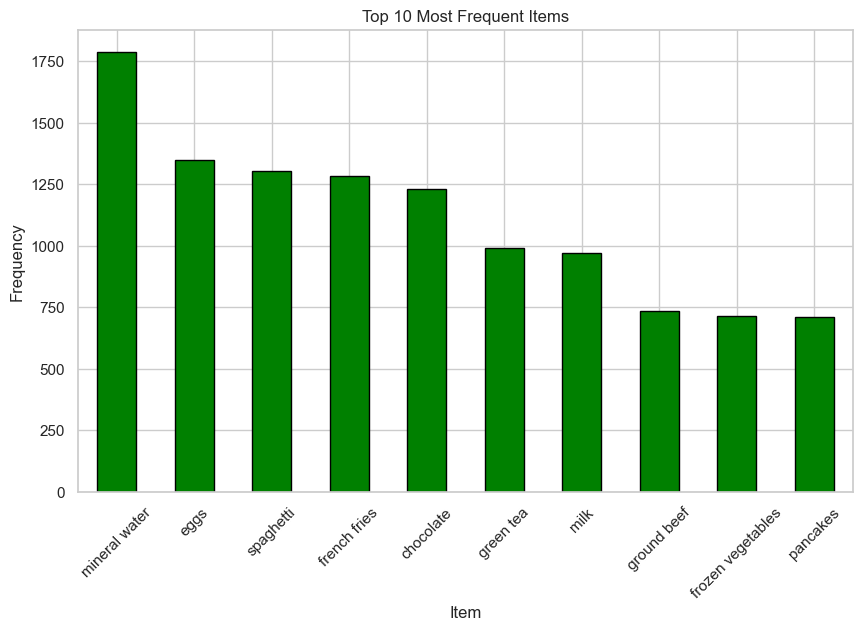

In [10]:
top_items = df['Order'].value_counts().head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
top_items.plot(kind='bar', color='green',edgecolor='black')
plt.title('Top 10 Most Frequent Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

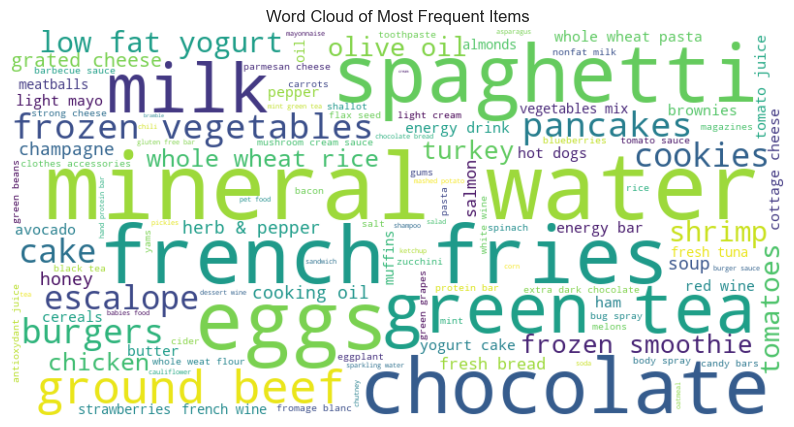

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['Order'].value_counts())
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Items')
plt.show()

# 5: Create Transactional Dataset
<a id="5"></a>
 ⬆️[Table Contents](#table_content)

In [12]:
transaction_df = df.groupby("InvoiceNo").apply(lambda x: x['Order'].unique())
transaction_df

InvoiceNo
Invoice0       [shrimp, almonds, avocado, vegetables mix, gre...
Invoice1                              [burgers, meatballs, eggs]
Invoice10                                       [eggs, pet food]
Invoice100            [mineral water, barbecue sauce, chocolate]
Invoice1000    [herb & pepper, red wine, spaghetti, eggs, who...
                                     ...                        
Invoice995        [ground beef, mineral water, milk, eggs, mint]
Invoice996                       [shrimp, body spray, green tea]
Invoice997                                     [frozen smoothie]
Invoice998     [herb & pepper, frozen vegetables, mineral wat...
Invoice999     [turkey, tomatoes, spaghetti, milk, cider, egg...
Length: 7501, dtype: object

# 6: Create One-Hot Encoded dataframe
<a id="6"></a>
 ⬆️[Table Contents](#table_content)
### Using mixtend transaction encoder

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
transactions_one_hot = te.fit(transaction_df).transform(transaction_df)
transactions_one_hot_df = pd.DataFrame(transactions_one_hot, columns=te.columns_)

transactions_one_hot_df

ModuleNotFoundError: No module named 'mlxtend'

<div style="background-color: green; border: 1px solid #333; border-radius: 5px; padding: 10px;">
<p>This datset has grown quite large - especially the total number of columns can become probleemetic: At the sane time, most values are empty(False). To save storage space, let's represent the transaction data in the <b>sparse format</b>. This is recommended if you have many products and many small transactions:</p>
</div>

In [ ]:
transactions_one_hot_sparse = te.fit(transaction_df).transform(transaction_df, sparse=True)
transactions_ohe_hot_sparse_df = pd.DataFrame.sparse.from_spmatrix(transactions_one_hot_sparse, columns=te.columns_)
transactions_ohe_hot_sparse_df.dtypes

 asparagus           Sparse[bool, 0]
almonds              Sparse[bool, 0]
antioxydant juice    Sparse[bool, 0]
asparagus            Sparse[bool, 0]
avocado              Sparse[bool, 0]
                          ...       
whole wheat pasta    Sparse[bool, 0]
whole wheat rice     Sparse[bool, 0]
yams                 Sparse[bool, 0]
yogurt cake          Sparse[bool, 0]
zucchini             Sparse[bool, 0]
Length: 120, dtype: object

In [ ]:
transactions_ohe_hot_sparse_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 7: Frequent itemsets -  Using Apriori


 ⬆️[Table Contents](#table_content)


<img src="https://www.researchgate.net/publication/265051526/figure/fig1/AS:295955556519941@1447572711738/Flow-chart-of-Apriori-algorithm.png">

<a id="7"></a>

<h4 style="text-align:start;color: red;">Our support threshold is 1%</h4>


In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(transactions_ohe_hot_sparse_df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(olive oil, mineral water, spaghetti)"


In [ ]:
# lets inspect the length of our itemsets:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values("length")

,support,itemsets,length
0,0.020397,(almonds),1
54,0.019864,(parmesan cheese),1
53,0.095054,(pancakes),1
52,0.065858,(olive oil),1
51,0.023064,(oil),1
...,...,...,...
241,0.010532,"(spaghetti, eggs, chocolate)",3
240,0.013465,"(eggs, mineral water, chocolate)",3
255,0.010265,"(olive oil, mineral water, spaghetti)",3
247,0.013065,"(eggs, mineral water, milk)",3


<h4 style="text-align:start;color: green;">the longest items contain 3 items</h4>

# 8: Association Rules
<a id="8"></a>
 ⬆️[Table Contents](#table_content)

<h4 style="text-align:start;color: red;">Our threshold is 20%</h4>

<div style="background-color:  green; border: 1px solid #333; border-radius: 5px; padding: 10px;">
    <h2><span>&#128221;</span> Note:</h2>
    <p>In the context of a grocery domain, setting the <b>min_threshold</b> for confidence to <b>0.2</b> could be reasonable</p>
    <p>Here are some considerations:</p>
    <ul>
        <li><b>Consumer Behavior:</b> Grocery purchases can vary widely, and lower confidence levels may still yield meaningful associations.</li>
        <li><b>Product Variety:</b> A lower threshold could capture a broader range of associations between items, including less frequent ones.</li>
        <li><b>Practical Implications:</b> Consider the operational impact of association rules on product placement and promotions.</li>
    </ul>
    <p>While a confidence threshold of <b>0.2</b> may be a good starting point, assess the impact of different values on rule quality and usefulness in grocery business.</p>
</div>


In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844,0.353384
3,(burgers),(green tea),0.087188,0.132116,0.017464,0.200306,1.516139,0.005945,1.085270,0.372947
4,(burgers),(milk),0.087188,0.129583,0.017864,0.204893,1.581175,0.006566,1.094717,0.402667
...,...,...,...,...,...,...,...,...,...,...
157,"(mineral water, milk)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597,0.492451
158,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071,0.547034
159,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514
160,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452


<div style="background-color: Green; border: 1px solid #333; border-radius: 5px; padding: 10px;">
    <h2><span>&#128722;</span> Inference:</h2>
    <ul>
        <li>You can see we got a total of <b>162</b> rules.</li>
    </ul>
    <p>lets get the top 3 rules sorted by confidence</p>
</div>


## 8.1: Filtering Rules
<a id="8.1"></a>
 ⬆️[Table Contents](#table_content)

In [ ]:
rules.sort_values("confidence", ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
133,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
151,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
122,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837


# 9: Conclusion
<a id="9"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: Green; border: 1px solid #333; border-radius: 5px; padding: 10px;">
    <h2><span>&#128722;</span> Inference:</h2>
    <p>The association rules generated from the grocery domain dataset reveal several interesting insights:</p>
    <ul>
        <li>One notable association is between <b>eggs</b> and <b>ground beef</b>, which are frequently purchased together, leading to the purchase of <b>mineral water</b> as a consequent. The <b>support for this association is 1.01%</b>, with a <b>confidence level of 50.67%</b> and a <b>lift value of 2.13</b>. This suggests that customers who buy eggs and ground beef are more likely to also purchase mineral water, making it a potential item to place strategically near these products.</li>
        <li>Similarly, the combination of <b>ground beef</b> and <b>milk</b> often leads to the purchase of <b>mineral water</b>, with a <b>support of 1.11%</b>, a <b>confidence level of 50.30%</b>, and a <b>lift value of 2.11</b>. This association indicates that customers buying ground beef and milk are inclined to buy mineral water as well, presenting an opportunity for targeted promotions or product bundling.</li>
        <li>Another interesting association is observed between <b>ground beef</b> and <b>chocolate</b>, resulting in the purchase of <b>mineral water</b> with a <b>support of 1.09%</b>, a <b>confidence level of 47.40%</b>, and a <b>lift value of 1.99</b>. This association suggests that customers purchasing ground beef and chocolate are also likely to buy mineral water, highlighting potential cross-category merchandising opportunities.</li>
    </ul>
    <p>These association rules provide valuable insights for grocery retailers to optimize product placement, promotions, and inventory management strategies, ultimately enhancing the overall shopping experience and driving revenue.</p>
</div>
